In [4]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
import numpy as np
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.utilities import Pareto_split

In [5]:
seed = 1
INVERT = True
uncertainty= 0.1

In [6]:
def image_infill(opt, front_value = 0., n_contours=20):
    #figure_properties
    fig = plt.figure(figsize=[9,7])
    ax = fig.gca()
    l_lims = opt.apply_weighting(np.array([[0, 0]]))
    u_lims = opt.apply_weighting(np.array([[1.5, 1.5]]))
    ax.set_xlim([0., 1.5])
    ax.set_ylim([0., 1.5])
    
    # compute infill
    M, N = 200, 200
    x = np.linspace(0., 1.5, M)
    y = np.linspace(0., 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    xyw = opt.apply_weighting(xy)
    zz = np.array([opt._scalarise_y(xyi, np.ones_like(xyi)*uncertainty*opt.obj_weights, invert=INVERT) for xyi in xyw])
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(opt.d[:,0], opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(opt.p[:,0], opt.p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(front_legend)
    labels.append("{}".format(front_value))
    ax.legend(handles, labels)
    
    return fig

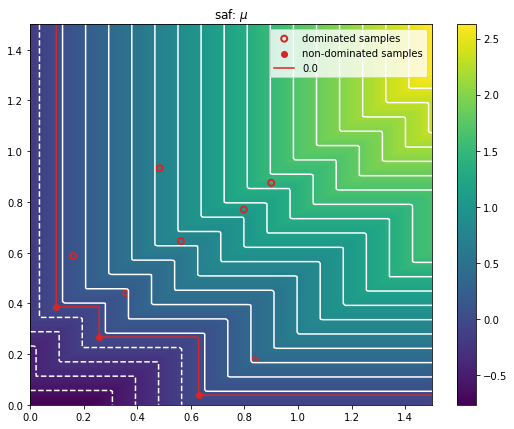

In [4]:
from testsuite.optimisers import Saf

saf_opt = Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
# saf_opt.obj_weights = np.ones_like(saf_opt.obj_weights)
fig_saf = image_infill(saf_opt)
fig_saf.axes[0].set_title("saf: $\mu$");
# fig_saf.axes[0].scatter((saf_opt.y*saf_opt.obj_weights)[:,0], (saf_opt.y*saf_opt.obj_weights)[:,1], c="magenta")

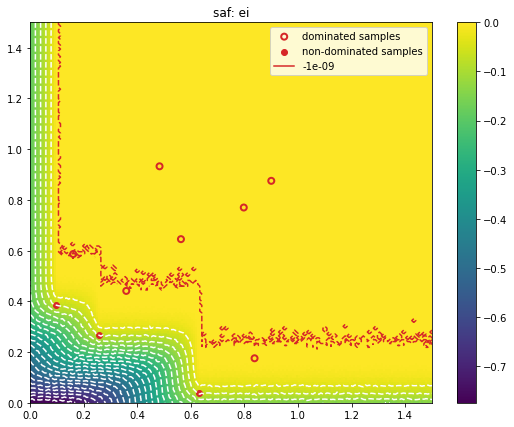

In [5]:
safei_opt = Saf(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
# safei_opt.obj_weights = np.ones_like(safei_opt.obj_weights)
front_v = -1e-9 if INVERT else 1e-9
fig_safei = image_infill(safei_opt, front_value=front_v)
fig_safei.axes[0].set_title("saf: ei");

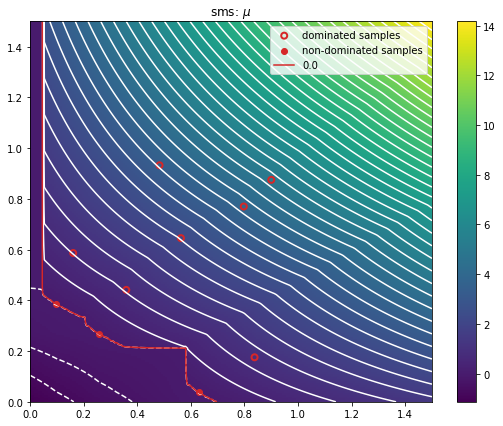

In [8]:
from testsuite.optimisers import SmsEgo

smsego_opt = SmsEgo(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)

# smsego_opt.obj_weights = np.ones_like(smsego_opt.obj_weights)
# smsego_opt.obj_offset = np.zeros_like(smsego_opt.obj_offset)
fig_smsego = image_infill(smsego_opt, n_contours=40)
fig_smsego.axes[0].set_title("sms: $\mu$");

Text(0.5, 1.0, 'sms: ei')

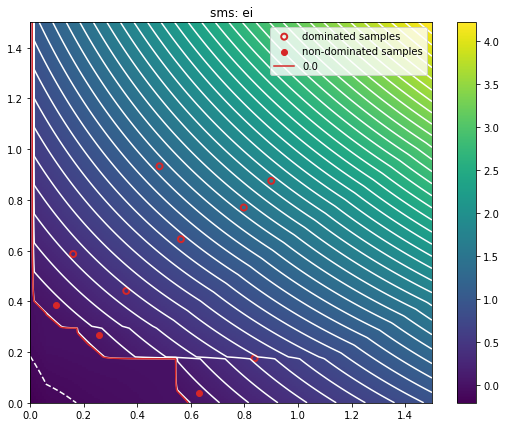

In [9]:
smsego_ei_opt = SmsEgo(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
smsego_ei_opt.obj_weights = np.ones_like(smsego_ei_opt.obj_weights)
smsego_ei_opt.obj_offset = np.zeros_like(smsego_ei_opt.obj_offset)

fig_smsego_ei = image_infill(smsego_ei_opt, n_contours=40)
fig_smsego_ei.axes[0].set_title("sms: ei") 

[1.88365878 2.87669527]
[0.09767591 0.03821028]


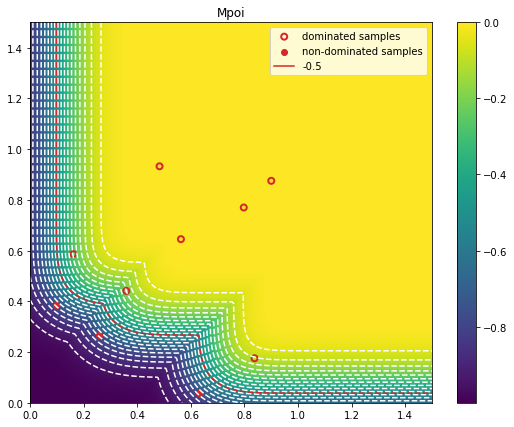

In [58]:
from testsuite.optimisers import Mpoi 

mpoi_opt = Mpoi(objective_function=lambda x: x[0:2],  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
# mpoi_opt.obj_weights = np.ones_like(mpoi_opt.obj_weights)
# mpoi_opt.obj_offset = np.zeros_like(mpoi_opt.obj_offset)


front_v = -0.5 if INVERT else 0.5
fig_mpoi = image_infill(mpoi_opt, front_value=front_v)
fig_mpoi.axes[0].set_title("Mpoi") 
print(mpoi_opt.obj_weights)
print(mpoi_opt.obj_offset)

Text(0.5, 1.0, 'sms-ego | saf')

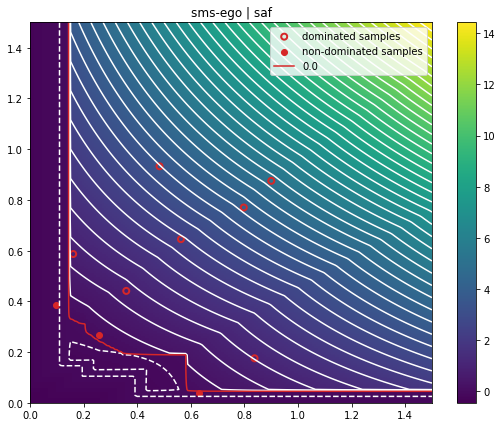

In [41]:
from testsuite.optimisers import Saf_Sms

safsms_opt = Saf_Sms(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_safsms = image_infill(safsms_opt, n_contours=40)
fig_safsms.axes[0].set_title("sms-ego | saf") 

AttributeError: 'Sms_Saf' object has no attribute 'current_hv'

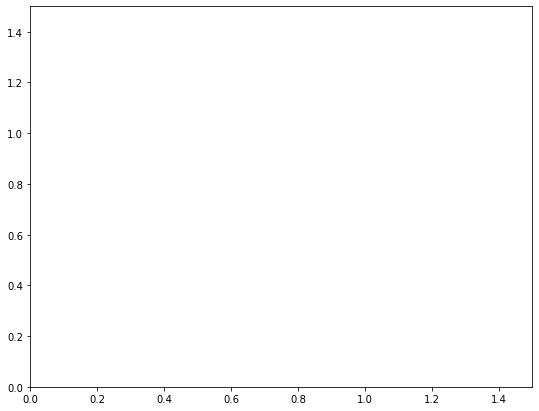

In [30]:
from testsuite.optimisers import Sms_Saf

smssaf_opt = Sms_Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smssaf = image_infill(smssaf_opt, n_contours=40)
fig_smssaf.axes[0].set_title("sms-ego | saf") 

Text(0.5, 1.0, 'saf ei | saf $\\mu$')

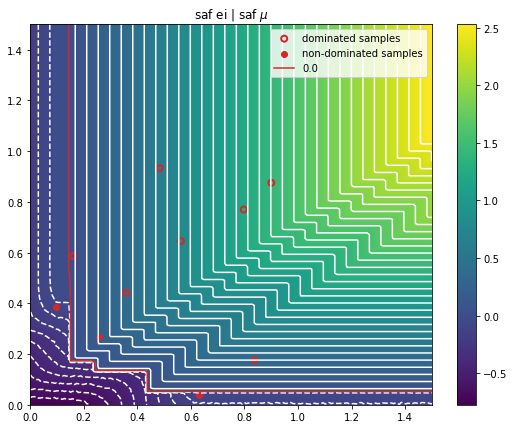

In [31]:
from testsuite.optimisers import Saf_Saf

safsaf_opt = Saf_Saf(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_safsaf = image_infill(safsaf_opt, n_contours=40)
fig_safsaf.axes[0].set_title("saf ei | saf $\mu$")

In [32]:
sys.path.append("/home/finley/phd/code/gecco-2017/IscaOpt")

In [33]:
from multi_surrogate import SMSEGO as alma_ego
from multi_surrogate import MPoI as alma_mpoi

In [34]:
sms = alma_ego(func= lambda x: x[0:2], n_dim=5, n_obj=2, lower_bounds=[0,0], upper_bounds=[10,10], Y=smsego_opt.y, ref_vector=[2., 2.])
yt, comp_mat = sms.get_dom_matrix(smsego_opt.y)
sms.pfr_inds = sms.get_front(smsego_opt.x, comp_mat)
sms.ytr = sms.Y
sms.current_hv = sms.current_hpv()
sms.epsilon =np.array([1., 1.]) 

pfr_inds = sms.get_front(sms.ytr, comp_mat)
current_hv = sms.current_hpv()
n_pfr = len(sms.pfr_inds)
c = 1 - (1/ 2**sms.n_obj)
sms.b_count = 22 
sms.epsilon = (np.max(sms.ytr, axis=0) - np.min(sms.ytr, axis=0))\
                /(n_pfr + (c * sms.b_count))
sms.ref_vector = smsego_ei_opt.ref_vector
print(sms.ref_vector)

[1.2 1.2]


In [35]:
sms._scalarise_y = lambda *args, **kwargs:-sms.scalarise_y(*args, **kwargs)[0]

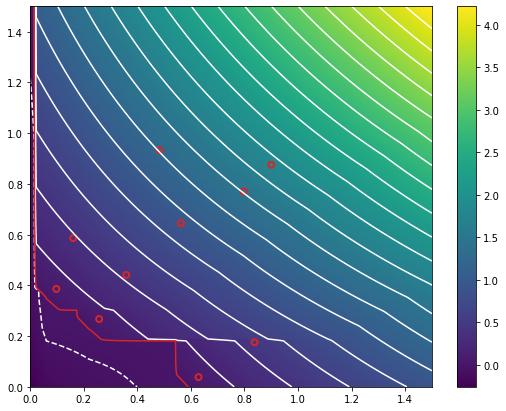

In [36]:
#figure_properties
fig = plt.figure(figsize=[9,7])
ax = fig.gca()
ax.set_xlim([0,1.5])
ax.set_ylim([0,1.5])

# compute infill
M, N = 200, 200
x = np.linspace(0, 1.5, M)
y = np.linspace(0, 1.5, N)
xx, yy = np.meshgrid(x, y)
xy = np.vstack((xx.flat, yy.flat)).T

zz = np.array([sms._scalarise_y(np.array(xy[i:i+1]), np.array([uncertainty,uncertainty]), True) for i in range(len(xy))])
zz = zz.reshape(N,M)

n_contours=20
front_value=0.
#image infill
pcol = ax.pcolor(xx, yy, zz)
levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
ax.contour(xx, yy, zz, colors="white", levels=levels)
if front_value is not None:
    ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
    front_legend = plt.Line2D([0], [0], c="C3")

# scatter samples
ax.scatter(sms.Y[:,0], sms.Y[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
fig.colorbar(pcol)
fig

In [37]:
sms.ref_vector

array([1.2, 1.2])

In [38]:
mpoi = alma_mpoi(func= lambda x: x[0:2], n_dim=5, n_obj=2, lower_bounds=[0,0], upper_bounds=[10,10], Y=smsego_opt.y, ref_vector=[2., 2.])

 <ipython-input-40-72232418de29>:28: UserWarning:No contour levels were found within the data range.


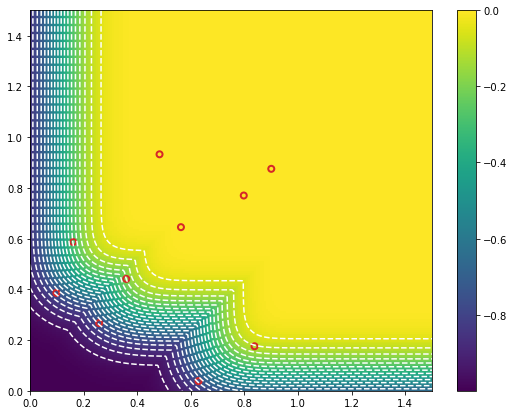

In [40]:
from scipy.special import erf as ERF 
from scipy.stats import norm as NORM

def f_mpoi(yp, stdp):
#     print(yp.shape)
#     print(stdp.shape)
    y = Pareto_split(sms.Y)[0]
    res = np.zeros((yp.shape[0], 1))
    sqrt2 = np.sqrt(2)
    for i in range(yp.shape[0]):
        m = (yp[i] - y)/(sqrt2 * stdp[i])
        pdom = 1 - np.prod(0.5 * (1 + ERF(m)), axis=1)
        res[i] = np.min(pdom)
    return -res
        
fig = plt.figure(figsize=[9,7])
ax = fig.gca()
ax.set_xlim([0,1.5])
ax.set_ylim([0,1.5])

zz = np.array([f_mpoi(np.array(xy[i:i+1]), np.array([[uncertainty,uncertainty]])) for i in range(len(xy))])
zz = zz.reshape(N,M)

pcol = ax.pcolor(xx, yy, zz)
levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
ax.contour(xx, yy, zz, colors="white", levels=levels)
if front_value is not None:
    ax.contour(xx, yy, zz, colors="C3", levels=[0.5])
    front_legend = plt.Line2D([0], [0], c="C3")

# scatter samples
ax.scatter(sms.Y[:,0], sms.Y[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
fig.colorbar(pcol)
fig